In [ ]:
import pandas as pd
import numpy as np
import json 
import math
import collections
import networkx as nx
from matplotlib import pyplot as plt

In [ ]:
filename= 'C:/Users/Ilenia/Desktop/university/SNA/info_rw.json'



# Real World Networks


In [ ]:
G = nx.read_weighted_edgelist('C:/Users/Ilenia/Desktop/university/SNA/data/tuscany_backboned.weighted.edgelist')

In [ ]:
N = len(G.nodes)
L = len(G.edges)
weights = sorted([G.edges[edge]['weight'] for edge in G.edges()], reverse=True)
density = nx.density(G)
print(N,L)
print(density)

15077 136686
0.0012026879688070856


Text(0, 0.5, 'cumulative number of edges')

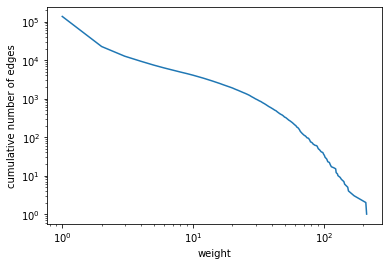

In [ ]:

weightsCount = collections.Counter(weights)
w, cnt = zip(*weightsCount.items())
cumcount = [0]
for i, c in enumerate(cnt):
    cumcount.append(c + cumcount[-1])
cumcount = cumcount[1:]
plt.plot(w, cumcount, linestyle = '-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('weight')
plt.ylabel('cumulative number of edges')


In [ ]:
data = dict()

data['name'] = 'Trip Advisor'
data['N_nodes'] = N
data['N_edges'] = L
data['density'] = density
with open(filename,'w+') as jf:
    json.dump(data,jf)

In [ ]:
with open(filename,'r') as jf:
    data = json.load(jf)
    
print(data)

{'name': 'Trip Advisor', 'N_nodes': 15077, 'N_edges': 136686, 'density': 0.0012026879688070856}


## Degree distribution analysis


In [ ]:
degrees = [(n,d) for n, d in G.degree()]

In [ ]:
with open(filename,'r') as jf:
    data = json.load(jf)

data['degrees'] = degrees

with open(filename,'w') as jf:
    json.dump(data,jf)

## Connected components analysis


In [ ]:
components =  [c for c in sorted(nx.connected_components(G), key=len, reverse=True)]
avg_size = np.average([len(c) for c in components[1:]])
print('average componets size: ', avg_size)
print(len(components))
print([len(c) for c in components[:20]],'etc...')

average componets size:  2.176470588235294
35
[15003, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] etc...


In [ ]:
with open(filename,'r') as jf:
    data = json.load(jf)

data['components'] = [len(c) for c in components]

with open(filename,'w') as jf:
    json.dump(data,jf)

In [ ]:
C = G.subgraph(components[0])


In [ ]:
with open(filename,'r') as jf:
    data = json.load(jf)
    
print (data)

{'name': 'Trip Advisor', 'N_nodes': 15077, 'N_edges': 136686, 'density': 0.0012026879688070856, 'degrees': [['0', 17], ['12', 11], ['37', 12], ['48', 12], ['50', 11], ['132', 9], ['142', 10], ['227', 10], ['238', 6], ['275', 16], ['278', 10], ['305', 14], ['315', 6], ['329', 13], ['369', 28], ['371', 12], ['387', 7], ['390', 19], ['392', 22], ['395', 17], ['396', 13], ['397', 17], ['406', 11], ['411', 21], ['414', 14], ['415', 15], ['421', 21], ['423', 18], ['428', 4], ['431', 16], ['432', 11], ['445', 14], ['448', 17], ['450', 10], ['451', 11], ['452', 20], ['458', 17], ['459', 25], ['461', 13], ['467', 16], ['474', 5], ['478', 7], ['486', 12], ['490', 2], ['497', 11], ['501', 11], ['504', 1], ['505', 12], ['507', 12], ['510', 8], ['517', 6], ['521', 14], ['524', 5], ['528', 10], ['531', 12], ['536', 18], ['541', 7], ['564', 12], ['591', 13], ['595', 7], ['600', 8], ['601', 21], ['604', 13], ['607', 11], ['619', 7], ['623', 11], ['628', 11], ['629', 14], ['633', 9], ['636', 3], ['692'

## Path analysis


To calculate distance we need to transform wweigth from Jaccard's coefficient to Jaccard's dissimlarty


In [ ]:
list(G.nodes)[:4]

['0', '12', '37', '48']

In [ ]:
nx.shortest_path_length(G, source='0', target='14012', weight=None)

2

In [ ]:
all_pairs = nx.average_shortest_path_length(C)

In [ ]:
with open(filename, 'r') as jf:
    data=json.load(jf)

data['all_pairs'] = all_pairs

with open(filename,'w') as jf:
    json.dump(data,jf)


In [ ]:
diameter= nx.diameter(C)

In [ ]:
with open(filename,'r') as jf:
    data = json.load(jf)

data['diameter'] = diameter

with open(filename,'w') as jf:
    json.dump(data,jf)

In [ ]:
with open(filename, 'r') as jf:
    data=json.load(jf)
    
print (data)

{'name': 'Trip Advisor', 'N_nodes': 15077, 'N_edges': 136686, 'density': 0.0012026879688070856, 'degrees': [['0', 17], ['12', 11], ['37', 12], ['48', 12], ['50', 11], ['132', 9], ['142', 10], ['227', 10], ['238', 6], ['275', 16], ['278', 10], ['305', 14], ['315', 6], ['329', 13], ['369', 28], ['371', 12], ['387', 7], ['390', 19], ['392', 22], ['395', 17], ['396', 13], ['397', 17], ['406', 11], ['411', 21], ['414', 14], ['415', 15], ['421', 21], ['423', 18], ['428', 4], ['431', 16], ['432', 11], ['445', 14], ['448', 17], ['450', 10], ['451', 11], ['452', 20], ['458', 17], ['459', 25], ['461', 13], ['467', 16], ['474', 5], ['478', 7], ['486', 12], ['490', 2], ['497', 11], ['501', 11], ['504', 1], ['505', 12], ['507', 12], ['510', 8], ['517', 6], ['521', 14], ['524', 5], ['528', 10], ['531', 12], ['536', 18], ['541', 7], ['564', 12], ['591', 13], ['595', 7], ['600', 8], ['601', 21], ['604', 13], ['607', 11], ['619', 7], ['623', 11], ['628', 11], ['629', 14], ['633', 9], ['636', 3], ['692'

## Clustering Coefficient, Density analysis


In [ ]:
clusterings =  nx.clustering(G)
print(clusterings)
with open(filename,'r') as jf:
    data = json.load(jf)

data['clusterings'] = clusterings 

with open(filename,'w') as jf:
    json.dump(data,jf)

{'0': 0.14705882352941177, '12': 0.2545454545454545, '37': 0.25757575757575757, '48': 0.3484848484848485, '50': 0.5272727272727272, '132': 0.4722222222222222, '142': 0.24444444444444444, '227': 0.4222222222222222, '238': 0.2, '275': 0.15, '278': 0.15555555555555556, '305': 0.1978021978021978, '315': 0.26666666666666666, '329': 0.24358974358974358, '369': 0.17989417989417988, '371': 0.19696969696969696, '387': 0.14285714285714285, '390': 0.38011695906432746, '392': 0.19480519480519481, '395': 0.3382352941176471, '396': 0.47435897435897434, '397': 0.2867647058823529, '406': 0.10909090909090909, '411': 0.3238095238095238, '414': 0.4175824175824176, '415': 0.41904761904761906, '421': 0.3333333333333333, '423': 0.35947712418300654, '428': 0.5, '431': 0.4666666666666667, '432': 0.5636363636363636, '445': 0.43956043956043955, '448': 0.4264705882352941, '450': 0.1111111111111111, '451': 0.45454545454545453, '452': 0.2736842105263158, '458': 0.41911764705882354, '459': 0.2633333333333333, '461'

In [ ]:
average_cluster= nx.average_clustering(G)

In [ ]:
print(average_cluster)

0.12772541450019373


In [ ]:
with open(filename,'r') as jf:
    data = json.load(jf)

data['average clustering '] = average_cluster

with open(filename,'w') as jf:
    json.dump(data,jf)